In [1]:
# Cell 1: Setup and Desired PWM Conversion

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

In [2]:
# Convert desired degrees to PWM based on datasheet formula
def deg2PWM(desire_deg_angles):
    output = []
    for angle in desire_deg_angles:
        pulse = round((7.4074 * angle) + 500, 0)
        output.append(pulse)
        print(f"// {angle} degrees => {pulse} PWM")
    return output

# Desired angles and corresponding PWM (based on formula)
desire_angles = [0, 45, 90, 135, 180, 270]
desired_PWM = deg2PWM(desire_angles)
print("\nDesired PWM values:", desired_PWM)

# Prompt to manually measure actual angles
print("\nPlease run the servo with the above PWM values and record the actual angles reached.")

// 0 degrees => 500.0 PWM
// 45 degrees => 833.0 PWM
// 90 degrees => 1167.0 PWM
// 135 degrees => 1500.0 PWM
// 180 degrees => 1833.0 PWM
// 270 degrees => 2500.0 PWM

Desired PWM values: [500.0, 833.0, 1167.0, 1500.0, 1833.0, 2500.0]

Please run the servo with the above PWM values and record the actual angles reached.


Actual angles entered: [-4, 40, 86, 130, 175, 260]


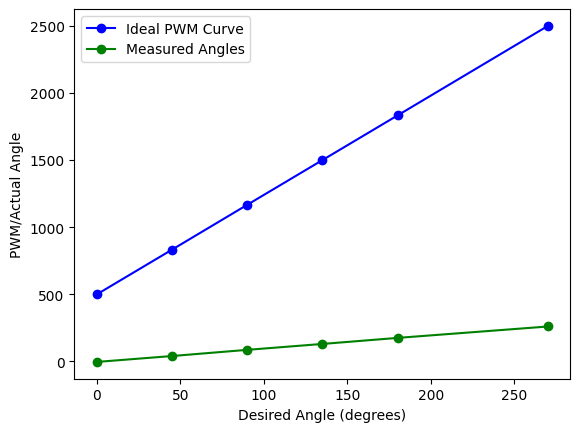

In [3]:
# Cell 2: Input Actual Angles Reached

# Input the actual angles measured for each corresponding PWM
# Replace with your own measurements for accuracy
actual_angles = [-4, 40, 86, 130, 175, 260]  # Example measurements
print("Actual angles entered:", actual_angles)

# Plot ideal vs actual for a quick visualization
plt.figure()
plt.plot(desire_angles, desired_PWM, 'bo-', label='Ideal PWM Curve')
plt.plot(desire_angles, actual_angles, 'go-', label='Measured Angles')
plt.xlabel('Desired Angle (degrees)')
plt.ylabel('PWM/Actual Angle')
plt.legend()
plt.show()


Best-fit parameters for PWM = 0.0011 * angle^2 + 7.2778 * angle + 533.5024


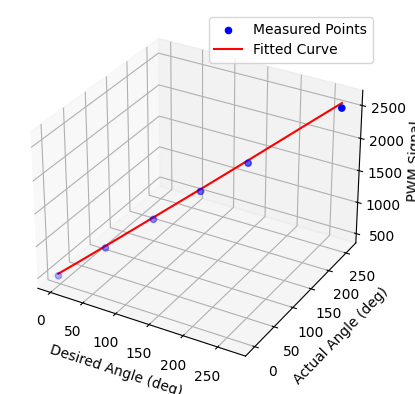

In [4]:
# Cell 3: Fit Curve and Plot in 3D

# Fit polynomial to relate PWM and actual angles to create correction curve
# Using a cubic spline to address non-linearity
cs = CubicSpline(desire_angles, actual_angles)

# Use the fitted curve to generate adjusted PWM for a more accurate result
adjusted_PWM = [cs(angle) for angle in desire_angles]

# Define a function to approximate the desired-to-PWM relationship
# General form: PWM = a*angle^2 + b*angle + c
def angle_to_pwm(x, a, b, c):
    return a * x**2 + b * x + c

# Use curve fitting to find optimal parameters for the correction
params, _ = curve_fit(angle_to_pwm, actual_angles, desired_PWM)
a, b, c = params
print(f"\nBest-fit parameters for PWM = {a:.4f} * angle^2 + {b:.4f} * angle + {c:.4f}")

# Plot the 3D fit with data points and correction curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the measured values
ax.scatter(desire_angles, actual_angles, desired_PWM, color='blue', label='Measured Points')

# Generate smooth line for the correction curve
angles_smooth = np.linspace(min(desire_angles), max(desire_angles), 100)
corrected_pwm = angle_to_pwm(angles_smooth, *params)
ax.plot(angles_smooth, cs(angles_smooth), corrected_pwm, color='red', label='Fitted Curve')

# Labels
ax.set_xlabel("Desired Angle (deg)")
ax.set_ylabel("Actual Angle (deg)")
ax.set_zlabel("PWM Signal")
plt.legend()
plt.show()

In [5]:
# Convert desired degrees to PWM based on datasheet formula
def deg2PWM_withOffset(desire_deg_angles, a, b, c):
    output = []
    for angle in desire_deg_angles:
        pulse = round((a * (angle**2)) + b*angle + c, 0)
        output.append(pulse)
        print(f"// {angle} degrees => {pulse} PWM")
    return output

# Desired angles and corresponding PWM (based on formula)
desire_angles = [0, 45, 90, 135, 180, 270]
desired_PWM = deg2PWM_withOffset(desire_angles, a, b, c)
print("\nDesired PWM values:", desired_PWM)

# Prompt to manually measure actual angles
print("\nPlease run the servo with the above PWM values and record the actual angles reached.")

// 0 degrees => 534.0 PWM
// 45 degrees => 863.0 PWM
// 90 degrees => 1197.0 PWM
// 135 degrees => 1535.0 PWM
// 180 degrees => 1878.0 PWM
// 270 degrees => 2576.0 PWM

Desired PWM values: [534.0, 863.0, 1197.0, 1535.0, 1878.0, 2576.0]

Please run the servo with the above PWM values and record the actual angles reached.


In [7]:
def arduino(angles):
  for angle in angles:
    print(f"  servo.writeMicroseconds({angle});")
arduino(desired_PWM)

   servo.writeMicroseconds(534.0);
   servo.writeMicroseconds(863.0);
   servo.writeMicroseconds(1197.0);
   servo.writeMicroseconds(1535.0);
   servo.writeMicroseconds(1878.0);
   servo.writeMicroseconds(2576.0);
